# Create Figures for Paper

In [21]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scienceplots

fsize = 8
tsize = 10
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('grid')
# plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

errbar_kwargs = dict(marker='.', markersize=3, capsize=3, elinewidth=1, lw=1)
plot_kwargs = dict(marker='.', markersize=3, lw=1)
errband_kwargs = dict(alpha=0.25)

save_dir = '../iclr/figures/experiments'

In [22]:
cmap = plt.cm.tab20
color_map = {
    'Abstractor': cmap(0), 'Pretrained': cmap(1), 
    'Transformer': cmap(4), 'Pretrained': cmap(5),
    'CoRelNet': cmap(2), 'CoRelNet (Asymmetric)': cmap(6), 'CoRelNet (No Softmax)': cmap(6),
    'Ablation Model': cmap(14)}

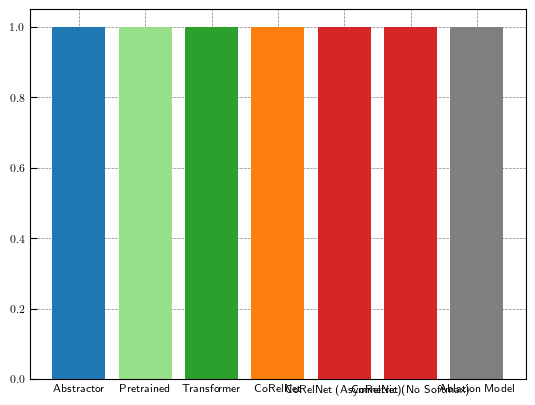

In [23]:
plt.bar(list(range(len(color_map))), 1, color=color_map.values());
plt.xticks(list(range(len(color_map))), color_map.keys());

## Pairwise Order relation

`experiments/pairwise_order`

In [24]:
%%capture
figure_data = pd.read_csv('figure_data/pairwise_order_learning_curves_2023-09-11-1300.csv', index_col=0)
agg_figure_data = figure_data.groupby(['group', 'train_size'])
metrics = ['binary_accuracy']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

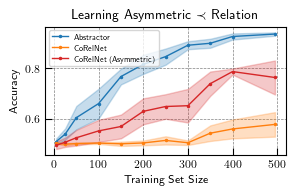

In [25]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'train_size'
metric_name = 'binary_accuracy'
label_map = {'abstractor': 'Abstractor', 'corelnet': 'CoRelNet', 'asymmetric_corelnet': 'CoRelNet (Asymmetric)'}
for group in label_map:
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    group_name = label_map[group]
    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Accuracy');
ax.set_title('Learning Asymmetric $\prec$ Relation')
ax.legend(loc='upper left', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/pairwise_order_learning_curves.pdf')

## SET

In [26]:
%%capture
figure_data = pd.read_csv('figure_data/set_learning_curves_2023-08-15.csv', index_col=0)
agg_figure_data = figure_data.groupby(['group', 'train_size'])
metrics = ['acc']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

In [27]:
agg_figure_data

,group,train_size,acc mean,acc max,acc sem,acc len
0,abstractor,500,0.60845,0.6560,0.007434,10
1,abstractor,1000,0.75195,0.8280,0.011227,10
2,abstractor,2000,0.94045,0.9615,0.005612,10
3,abstractor,5000,0.96635,0.9810,0.003851,10
4,corelnet,500,0.51685,0.5335,0.004333,10
5,corelnet,1000,0.51860,0.5350,0.003206,10
6,corelnet,2000,0.51435,0.5360,0.003982,10
7,corelnet,5000,0.53170,0.5415,0.002451,10
8,no-softmax corelnet,500,0.54260,0.5630,0.004342,10
9,no-softmax corelnet,1000,0.58255,0.6130,0.006180,10


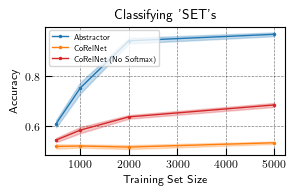

In [28]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'train_size'
metric_name = 'acc'
label_map = {'abstractor': 'Abstractor', 'corelnet': 'CoRelNet', 'no-softmax corelnet': 'CoRelNet (No Softmax)'}
for group in label_map:
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    group_name = label_map[group]
    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Accuracy');
ax.set_title("Classifying 'SET's")
ax.legend(loc='upper left', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/set_classification.pdf')

## Random Object Sorting

experiment in `experiments/object_argsort_autoregressive`

W&B project: `object_argsort_autoregressive`

In [29]:
%%capture
figure_data = pd.read_csv('figure_data/object_argsort_autoregressive.csv', index_col=0)
agg_figure_data = figure_data.groupby(['group', 'train size'])
metrics = ['teacher_forcing_accuracy', 'elementwise_accuracy', 'full_sequence_accuracy', 'epoch/epoch']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

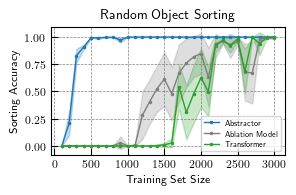

In [30]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'train size'
metric_name = 'full_sequence_accuracy'

label_map = {'Relational Abstractor': 'Abstractor', 'Ablation Abstractor': 'Ablation Model', 'Transformer': 'Transformer'}
for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='lower right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
ax.set_title('Random Object Sorting');
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/random_object_sorting.pdf')

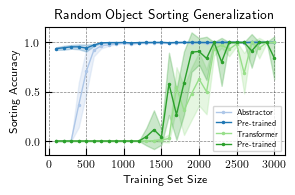

In [31]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'train size'
metric_name = 'full_sequence_accuracy'

color_map_ = {
    'Abstractor': cmap(1), 'Pre-trained': cmap(0),
    'Transformer': cmap(5), 'Pre-trained ': cmap(4),
    }

label_map = {
    'Simple Abstractor': 'Abstractor',
    'Simple Abstractor (Pre-Trained; reshuffled attr)': 'Pre-trained',
    'Transformer': 'Transformer', 'Transformer (Pre-Trained; reshuffled attr)': 'Pre-trained '}

for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    linestyle = ':' if ('pre-trained' in group_name) else '-'
    ax.plot(x, y, **plot_kwargs, c=color_map_[group_name], linestyle=linestyle, label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map_[group_name], **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='lower right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8, ncol=1);
ax.set_title('Random Object Sorting Generalization');
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/random_object_sorting_generalization.pdf')

## Robustness

directory: `experiments/robustness_object_sorting`
W&B project: `robustness_object_sorting`

In [32]:
%%capture
figure_data = pd.read_csv('figure_data/multiplicative_robustness_data.csv', index_col=0)
agg_figure_data = figure_data.groupby(['model', 'noise level'])
metrics = ['teacher_forcing_accuracy', 'elementwise_accuracy', 'full_sequence_accuracy']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

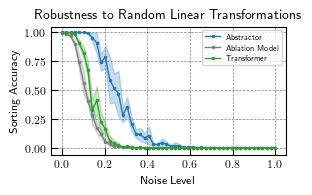

In [33]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'noise level'
metric_name = 'full_sequence_accuracy'

label_map = {'Relational Abstractor': 'Abstractor', 'Ablation Model': 'Ablation Model', 'Transformer': 'Transformer'}
for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.model==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Noise Level');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='upper right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
ax.set_title('Robustness to Random Linear Transformations');
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/multiplicative_robustness.pdf')

In [34]:
%%capture
figure_data = pd.read_csv('figure_data/additive_robustness_data.csv', index_col=0)
agg_figure_data = figure_data.groupby(['model', 'noise level'])
metrics = ['teacher_forcing_accuracy', 'elementwise_accuracy', 'full_sequence_accuracy']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

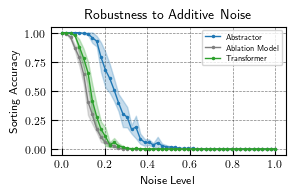

In [35]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'noise level'
metric_name = 'full_sequence_accuracy'

label_map = {'Relational Abstractor': 'Abstractor', 'Ablation Model': 'Ablation Model', 'Transformer': 'Transformer'}
for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.model==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Noise Level');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='upper right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
ax.set_title('Robustness to Additive Noise');
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/additive_robustness.pdf')

## SET (comparison to symbolic baseline)

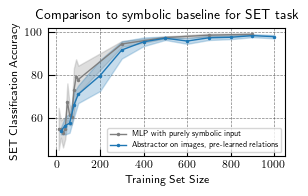

In [36]:
def plot_symbolic_comparison(pretrained_n, pretrained_accs, scratch_n, scratch_accs):
    import scipy.stats
    scratch_accuracy = np.mean(scratch_accs, axis=1)
    scratch_acc_sem = scipy.stats.sem(scratch_accs, axis=1)
    pretrained_accuracy = np.mean(pretrained_accs, axis=1)
    pretrained_acc_sem = scipy.stats.sem(pretrained_accs, axis=1)
    fig, ax = plt.subplots(figsize=(3,2))
    ax.plot(scratch_n, scratch_accuracy, **plot_kwargs, c=color_map['Ablation Model'], label='MLP with purely symbolic input')
    ax.fill_between(scratch_n, scratch_accuracy - 2*scratch_acc_sem,
        scratch_accuracy + 2*scratch_acc_sem, color=color_map['Ablation Model'], **errband_kwargs)
    ax.plot(pretrained_n, pretrained_accuracy, c=color_map['Abstractor'], label='Abstractor on images, pre-learned relations', **plot_kwargs)
    ax.fill_between(pretrained_n, pretrained_accuracy - 2*pretrained_acc_sem,
        pretrained_accuracy + 2*pretrained_acc_sem, color=color_map['Abstractor'], **errband_kwargs)
    ax.set_xlabel('Training Set Size')
    ax.legend(loc='lower right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
    ax.set_ylabel('SET Classification Accuracy')
    ax.set_title("Comparison to symbolic baseline for SET task")
    fig.set_tight_layout(True)
    fig.savefig(f'{save_dir}/set_symbolic_vs_abstractor.pdf')
    plt.show()

dat = np.load('symbolic_vs_abstractor_run0.npz')
train_sizes = dat['train_sizes']
accs = dat['accs']
symbolic_train_sizes = dat['symbolic_train_sizes']
symbolic_accs = dat['symbolic_accs']
plot_symbolic_comparison(train_sizes, accs, symbolic_train_sizes, symbolic_accs)
